## Process data

Here we create the dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
from tqdm import tqdm

sys.path.append('./code')

In [3]:
path_labels = './data/labels/'
path_images = './data/images/top/'
labels_list = os.listdir(path_labels)
images_list = os.listdir(path_images)

In [4]:
len(labels_list), len(images_list)

(33, 33)

In [5]:
valid_ids = [i.replace('top_mosaic_09cm_area', '').replace('.tif', '') for i in images_list]
len(valid_ids)

33

In [6]:
sample = np.random.choice(valid_ids)
im_path = f'{path_images}/top_mosaic_09cm_area{sample}.tif'
la_path = f'{path_labels}/top_mosaic_09cm_area{sample}.tif'

In [117]:
label_color_map = {
    'surface': [255, 255, 255],
    'bluiding': [0,0,255],
    'low_veg': [0, 255, 255],
    'tree': [0, 255, 0],
    'car': [255, 255, 0],    
    'background': [255, 0, 0]}

color_label_map = {str(v):k for k,v in label_color_map.items()}    
    
# we dont want background
label_classes_map = {k:i for i,k in enumerate(list(label_color_map.keys())[:5])}

In [74]:
tile_size = 200

./data/images/top//top_mosaic_09cm_area27.tif


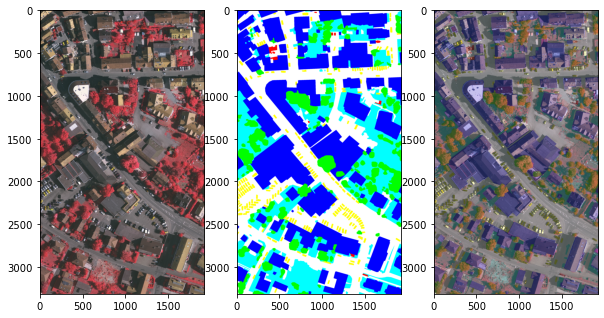

In [75]:
print(im_path)
im = plt.imread(im_path)
labels = plt.imread(la_path)
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(im)
plt.subplot(1,3,2)
plt.imshow(labels)
plt.subplot(1,3,3)
plt.imshow(im)
plt.imshow(labels, alpha=0.2)

### test cropping functions

- first we test the function to generate tiles from image with no augmentation.

In [112]:
def create_px_annotations(px_labels):
    linear_pixes = np.vstack(px_labels)
    unique_colors = np.unique(linear_pixes, axis=0)
    classes = [color_label_map[str(list(c))] for c in unique_colors]
    classes_ids = [label_classes_map[c] for c in classes if c not in 'background']
    one_hot = [1 if i in classes_ids else 0 for i in range(5)]
    
    total_pixes = px_labels.shape[0] * px_labels.shape[1]
    percent_colors = [np.sum(np.all(linear_pixes==uc,axis=1))/total_pixes for uc in unique_colors]
    percet_colors_by_class = [0] * 5
    for c, percent in zip(classes_ids, percent_colors):
        percet_colors_by_class[c] = percent
#     print(percet_colors_by_class)
    
    
    return one_hot, percet_colors_by_class

In [113]:
import image_cropping
boxes = image_cropping.generate_cropping_boxes(im.shape[1], im.shape[0], tile_size, thresh=0.3)

In [114]:
box = boxes[np.random.choice(range(len(boxes)))]
im_c = image_cropping.crop_np_image_using_box(im, box)
lab_c = image_cropping.crop_np_image_using_box(labels, box)

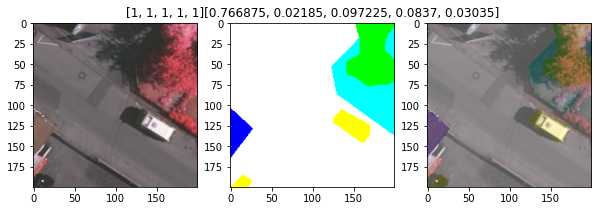

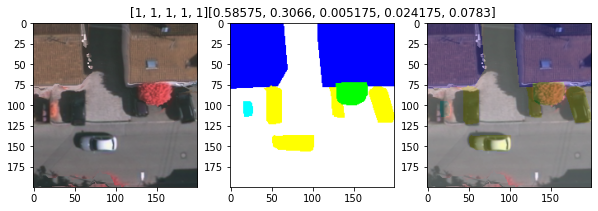

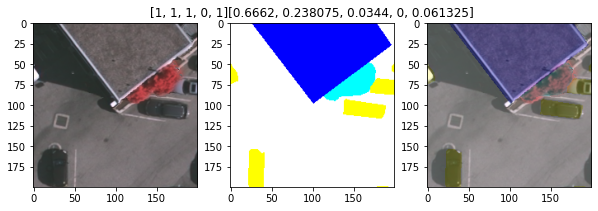

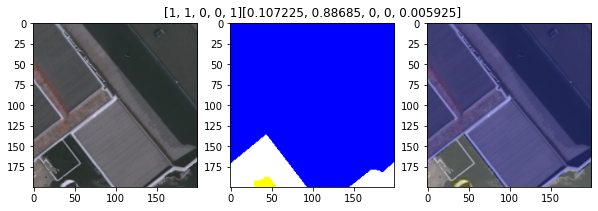

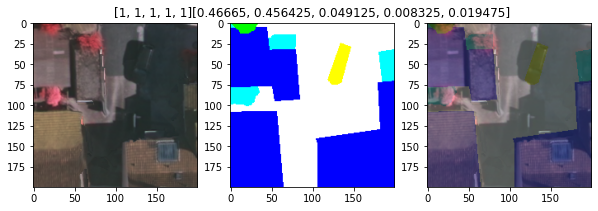

In [116]:
for i in range(5):
    box = boxes[np.random.choice(range(len(boxes)))]
    im_c = image_cropping.crop_np_image_using_box(im, box)
    lab_c = image_cropping.crop_np_image_using_box(labels, box)
    plt.figure(figsize=(10,10))
    plt.subplot(1,3,1)
    plt.imshow(im_c)
    ax = plt.subplot(1,3,2)
    oh_classes, oh_percents = create_px_annotations(lab_c)
    ax.set_title(str(oh_classes)+str(oh_percents))
    plt.imshow(lab_c)
    plt.subplot(1,3,3)
    plt.imshow(im_c)
    plt.imshow(lab_c, alpha=0.2)

# TODO
#### test rotated patches

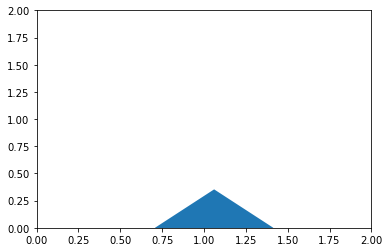

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(0, 2)
ax.set_xlim(0, 2)

rect = patches.Rectangle((0.5,0.5),0.5,0.5)

# t_start = ax.transData
t = mpl.transforms.Affine2D().rotate_deg(-45)
t2 = mpl.transforms.Affine2D().rotate_deg(-45) + ax.transData
rect.set_transform(t2)
ax.add_patch(rect)

plt.show()